### 이미지 데이터 수집
- 이미지 데이터를 수집하여 폴더에 저장
- 수집한 이미지를 저장할 공간 (폴더) 생성하는 코드도 자동화

In [2]:
# 라이브러리 불러오기
# ChromeDriverManager, Service 라이브러리를 사용하여 
# Chromedriver(컴퓨터용 크롬창) 를 관리
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium import  webdriver as wb # 컴퓨터용 브라우저
from selenium.webdriver.common.keys import Keys # 컴퓨터용 키보드
from selenium.webdriver.common.by import By # 기준 -> 선택자 지정 방식

import time # 딜레이할 라이브러리

import pandas as pd # df만드는 라이브러리

from bs4 import BeautifulSoup as bs 

import os # 파일 시스템 라이브러리 -> 폴더 생성
from urllib.request import urlretrieve # 이미지처리 라이브러리 -> 수집한 경로(src) -> 이미지파일로 변경

from tqdm import tqdm as tq  # 진행상황 시각화

In [3]:
# os 라이브러리를 활용하여 폴더를 생성
# os.mkdir('경로/폴더명')
# os.mkdir('C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감')
# 폴더 생성시 동일한 이름의 폴더가 있으면 오류 발생!
# 동명의 폴더가 있으면 있다고 출력
if not os.path.isdir('C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감') :
    print('폴더생성')
    os.mkdir('C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감')
else :
    print('동명의 폴더가 존재합니다.')

동명의 폴더가 존재합니다.


In [42]:
# os.mkdir('C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감/포켓몬 사진')

In [4]:
# 브라우저 열기
s = Service(ChromeDriverManager().install())
driver = wb.Chrome(service=s)
driver.get('https://www.pokemonkorea.co.kr/pokedex#pokedex_1')

time.sleep(2)

In [29]:
driver.find_elements(By.CLASS_NAME, 'img-fluid')

[<selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b05a2637b", element="f.E06667D49BACA0BC85E76DB6A1C1E6AE.d.D403CAEEC0A75FF5151DAC992146004B.e.75")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b05a2637b", element="f.E06667D49BACA0BC85E76DB6A1C1E6AE.d.D403CAEEC0A75FF5151DAC992146004B.e.76")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b05a2637b", element="f.E06667D49BACA0BC85E76DB6A1C1E6AE.d.D403CAEEC0A75FF5151DAC992146004B.e.77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b05a2637b", element="f.E06667D49BACA0BC85E76DB6A1C1E6AE.d.D403CAEEC0A75FF5151DAC992146004B.e.79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b05a2637b", element="f.E06667D49BACA0BC85E76DB6A1C1E6AE.d.D403CAEEC0A75FF5151DAC992146004B.e.78")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b13ceb51ce02a5111f3e032b0

In [30]:
# 이미지태그 요소 확인 -> bs 객체화 진행
# bs(페이지 정보, 파싱 방법)
bs(driver.page_source, 'lxml')
soup = bs(driver.page_source, 'lxml')

In [31]:
soup.select('img.img-fluid')
soup.select('img.img-fluid')[0]

<img alt="" class="img-fluid" src="https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png"/>

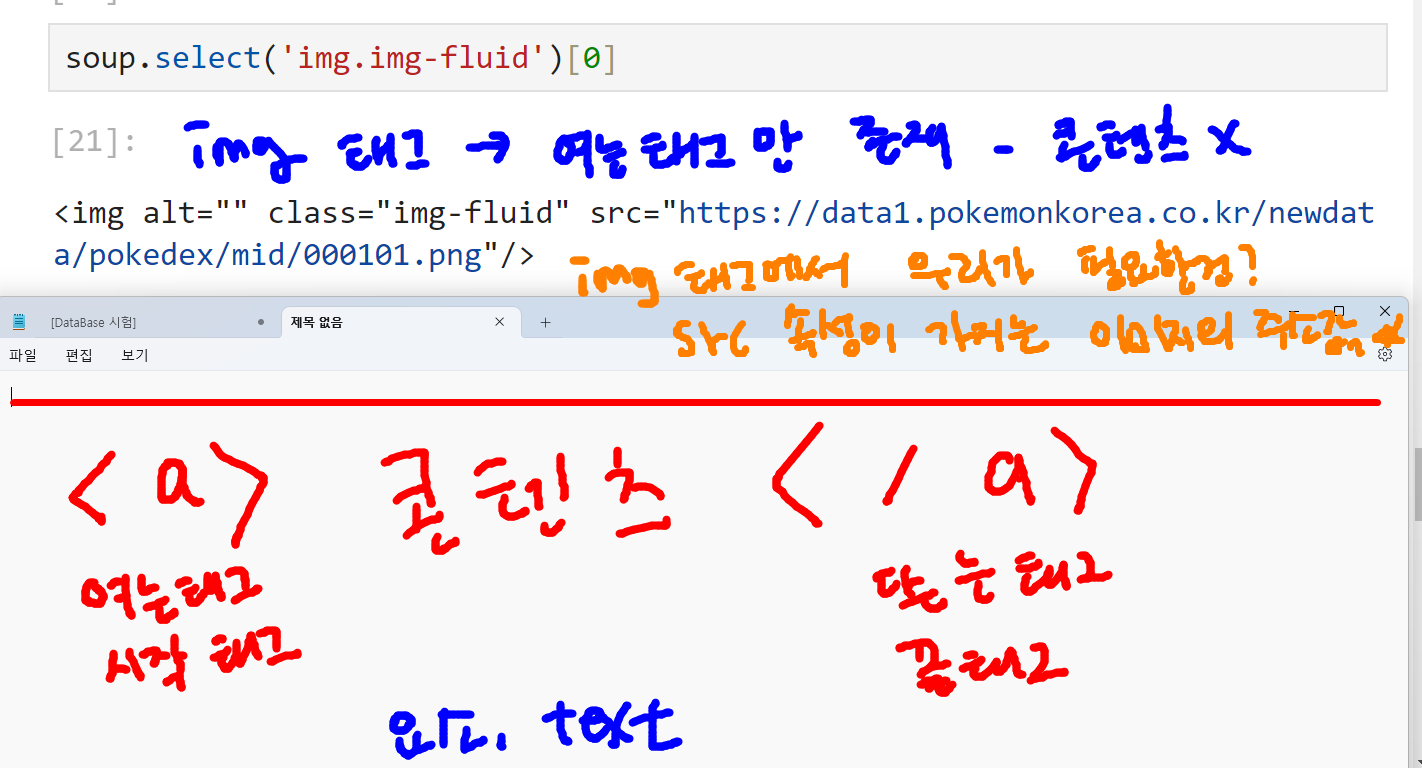

In [32]:
img = soup.select('img.img-fluid')

In [33]:
# 속성값을 추출하는 방법
# 요소['src']
img[0]['src']

'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png'

- 드라이버를 통해 요소 가져와서 이미지 수집 (속성추출)

In [8]:
driver.find_elements(By.CLASS_NAME, 'img-fluid')
img_final = driver.find_elements(By.CLASS_NAME, 'img-fluid')
img_final[0].get_attribute('src')

'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png'

In [9]:
# 순수한 이미지 주소만을 담은 리스트를 생성
img_list = []
for i in img_final :
    img_list.append(i.get_attribute('src'))

In [10]:
img_list

['https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000201.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000301.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000302.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000303.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000401.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000501.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000601.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000602.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000603.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000604.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000701.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000801.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000901.png',
 'https://data1.pokemonkorea.co.kr/newdata/poked

In [43]:
# 이미지 주소를 활용하여 이미지 파일로 저장
# urlretrieve(이미지 주소, 저장할 위치/파일이름.확장자)

# 첫번째 이미지만 이미지 파일로 저장
urlretrieve(img_list[0],'C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감/포켓몬 사진/포켓몬.jpg')

('C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감/포켓몬 사진/포켓몬.jpg',
 <http.client.HTTPMessage at 0x2e58536fad0>)

- 더 많은 이미지 정보를 가져오기 위해 스크롤 진행

In [48]:
# end 키를 활용하여 스크롤 내리기
# 화면 전체를 담당하는 body태그에게 end 키보드를 전송
body = driver.find_element(By.CSS_SELECTOR,'body')
for i in tq(range(20)) :
    body.send_keys(Keys.END)
    time.sleep(0.5)

100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


In [45]:
# 여러마리 포켓몬 사진 저장
for i in tq(range(len(img_list))):
    urlretrieve(img_list[i], f'C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감/포켓몬 사진/포켓몬{i+1}.jpg')

100%|██████████| 1252/1252 [04:09<00:00,  5.03it/s]


- 코드 합치기

In [49]:
# 브라우저 열기
s = Service(ChromeDriverManager().install())
driver = wb.Chrome(service=s)
driver.get('https://www.pokemonkorea.co.kr/pokedex#pokedex_1')

time.sleep(2)

# end 키를 활용하여 스크롤 내리기
# 화면 전체를 담당하는 body태그에게 end 키보드를 전송
body = driver.find_element(By.CSS_SELECTOR,'body')
for i in tq(range(20)) :
    body.send_keys(Keys.END)
    time.sleep(0.5)

# 요소 수집
img_final = driver.find_elements(By.CLASS_NAME, 'img-fluid')

# 순수한 이미지 주소만을 담은 리스트를 생성
img_list = []
for i in img_final :
    img_list.append(i.get_attribute('src'))

# 주소를 이미지 파일로 저장
for i in tq(range(len(img_list))):
    urlretrieve(img_list[i], f'C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python/crawling/포켓몬도감/포토/포켓몬{i+1}.jpg')

100%|██████████| 288/288 [01:14<00:00,  3.86it/s]


In [24]:
# 현재 문서의 전체 높이를 가져와 초기값으로 설정
last_height = driver.execute_script("return document.body.scrollHeight")

# 페이지 끝에 도달할 때까지 무한 루프
while True:
    # 현재 화면을 문서의 가장 아래로 스크롤
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # 페이지 로딩을 위해 0.5초 대기
    # 네트워크 속도나 페이지 복잡도에 따라 조정 가능
    time.sleep(0.5)
    
    # 스크롤 후 문서의 새로운 높이를 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    # 새 높이와 이전 높이가 같다면 더 이상 스크롤할 내용이 없음을 의미
    if new_height == last_height:
        # 루프를 종료하고 스크롤 작업을 마침
        break
    
    # 새 높이를 다음 비교를 위해 저장
    # 다음 반복에서 이 값이 'last_height'로 사용됨
    last_height = new_height

# 이 지점에 도달하면 페이지의 끝까지 스크롤된 상태

# # 한 번에 모든 요소 찾기
# img_elements = driver.find_elements(By.CSS_SELECTOR, '.img-fluid')
# num_name_elements = driver.find_elements(By.CSS_SELECTOR, '.bx-txt > h3')

# # 리스트 컴프리헨션을 사용하여 데이터 추출
# img_list = [img.get_attribute('src') for img in img_elements]
# num_list = [element.text.split('\n')[0] for element in num_name_elements]
# name_list = [element.text.split('\n')[1] for element in num_name_elements]

img_list = []
num_list = []
name_list = []
form_list = []

img = driver.find_elements(By.CLASS_NAME, 'img-fluid')
num_name = driver.find_elements(By.CLASS_NAME, 'bx-txt>h3')
form = driver.find_elements(By.CLASS_NAME, 'bx-txt>p')

for i in tq(range(len(img))) :
    img_list.append(img[i].get_attribute('src'))
    num_list.append(num_name[i].text.split('\n')[0])
    name_list.append(num_name[i].text.split('\n')[1])
    form_list.append(form[i].text)
dic = {'포켓몬 사진':img_list,'포켓몬 번호':num_list,'포켓몬 이름':name_list, '포켓몬 폼' : form_list}
poketmon = pd.DataFrame(dic)
poketmon.index+=1
poketmon.to_csv('포켓몬도감/poketmon.csv', encoding='euc-kr')

100%|██████████| 1252/1252 [00:49<00:00, 25.45it/s]


In [40]:
df = pd.read_csv('포켓몬도감/poketmon.csv', encoding='euc-kr')
df


,Unnamed: 0,포켓몬 사진,포켓몬 번호,포켓몬 이름,포켓몬 폼
0,1,https://data1.pokemonkorea.co.kr/newdata/poked...,No.0001,이상해씨,NaN
1,2,https://data1.pokemonkorea.co.kr/newdata/poked...,No.0002,이상해풀,NaN
2,3,https://data1.pokemonkorea.co.kr/newdata/poked...,No.0003,이상해꽃,NaN
3,4,https://data1.pokemonkorea.co.kr/newdata/poked...,No.0003,메가이상해꽃,NaN
4,5,https://data1.pokemonkorea.co.kr/newdata/poked...,No.0003,이상해꽃,거다이맥스의 모습
...,...,...,...,...,...
1247,1248,https://data1.pokemonkorea.co.kr/newdata/poked...,No.1023,무쇠감투,NaN
1248,1249,https://data1.pokemonkorea.co.kr/newdata/poked...,No.1024,테라파고스,노말폼
1249,1250,https://data1.pokemonkorea.co.kr/newdata/poked...,No.1024,테라파고스,테라스탈폼
1250,1251,https://data1.pokemonkorea.co.kr/newdata/poked...,No.1024,테라파고스,스텔라폼
